In this case study, I have compared observed weather data from two sources. The first source is about climate normals of Austin, Texas from 1981-2010 from national ocenaic and atmospheric adminstration (NOAA). This dataset consists of climate measurements for each hour of the day averaged over 30 years. The second is from Austin weather data from 2011. This also has the hourly readings of many climate-related measurements like temparature, dew point and son on. The data source has also has many unrelated measurements and null values etc. 

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv('https://assets.datacamp.com/production/course_1639/datasets/NOAA_QCLCD_2011_hourly_13904.txt', header=None)

In [13]:
df.head()

0         1    2   3       4  5      6  7  8  9  ...   34 35     36 37  \
0  13904  20110101   53  12  OVC045     10.00          ...          29.95      
1  13904  20110101  153  12  OVC049     10.00          ...          30.01      
2  13904  20110101  253  12  OVC060     10.00          ...  030     30.01      
3  13904  20110101  353  12  OVC065     10.00          ...          30.03      
4  13904  20110101  453  12  BKN070     10.00          ...          30.04      

   38 39 40 41     42 43  
0  AA           29.95     
1  AA           30.02     
2  AA           30.02     
3  AA           30.04     
4  AA           30.04     

[5 rows x 44 columns]

After the initial step of reading in the data, the next step is to clean and tidy it so that it is easier to work with.

In [14]:
column_labels_str = 'Wban,date,Time,StationType,sky_condition,sky_conditionFlag,visibility,visibilityFlag,wx_and_obst_to_vision,wx_and_obst_to_visionFlag,dry_bulb_faren,dry_bulb_farenFlag,dry_bulb_cel,dry_bulb_celFlag,wet_bulb_faren,wet_bulb_farenFlag,wet_bulb_cel,wet_bulb_celFlag,dew_point_faren,dew_point_farenFlag,dew_point_cel,dew_point_celFlag,relative_humidity,relative_humidityFlag,wind_speed,wind_speedFlag,wind_direction,wind_directionFlag,value_for_wind_character,value_for_wind_characterFlag,station_pressure,station_pressureFlag,pressure_tendency,pressure_tendencyFlag,presschange,presschangeFlag,sea_level_pressure,sea_level_pressureFlag,record_type,hourly_precip,hourly_precipFlag,altimeter,altimeterFlag,junk'

column_labels_list = column_labels_str.split(',')

df.columns = column_labels_list

In [15]:
list_to_drop = ['sky_conditionFlag',
 'visibilityFlag',
 'wx_and_obst_to_vision',
 'wx_and_obst_to_visionFlag',
 'dry_bulb_farenFlag',
 'dry_bulb_celFlag',
 'wet_bulb_farenFlag',
 'wet_bulb_celFlag',
 'dew_point_farenFlag',
 'dew_point_celFlag',
 'relative_humidityFlag',
 'wind_speedFlag',
 'wind_directionFlag',
 'value_for_wind_character',
 'value_for_wind_characterFlag',
 'station_pressureFlag',
 'pressure_tendencyFlag',
 'pressure_tendency',
 'presschange',
 'presschangeFlag',
 'sea_level_pressureFlag',
 'hourly_precip',
 'hourly_precipFlag',
 'altimeter',
 'record_type',
 'altimeterFlag',
 'junk']


df_cleaned= df.drop(list_to_drop, axis = 'columns')


print(df_cleaned.head())


    Wban      date  Time  StationType sky_condition visibility dry_bulb_faren  \
0  13904  20110101    53           12        OVC045      10.00             51   
1  13904  20110101   153           12        OVC049      10.00             51   
2  13904  20110101   253           12        OVC060      10.00             51   
3  13904  20110101   353           12        OVC065      10.00             50   
4  13904  20110101   453           12        BKN070      10.00             50   

  dry_bulb_cel wet_bulb_faren wet_bulb_cel dew_point_faren dew_point_cel  \
0         10.6             38          3.1              15          -9.4   
1         10.6             37          3.0              14         -10.0   
2         10.6             37          2.9              13         -10.6   
3         10.0             38          3.1              17          -8.3   
4         10.0             37          2.8              15          -9.4   

  relative_humidity wind_speed wind_direction station_pr

We can see that we have seperate date and time columns which can be converted into pandas time series.

In [16]:
# Convert the date column to string: df_dropped['date']
df_cleaned['date'] = df_cleaned['date'].astype(str)

# Pad leading zeros to the Time column: df_dropped['Time']
df_cleaned['Time'] = df_cleaned['Time'].apply(lambda x:'{:0>4}'.format(x))

# Concatenate the new date and Time columns: date_string
date_string = df_cleaned['date'] + df_cleaned['Time']

# Convert the date_string Series to datetime: date_times
date_times = pd.to_datetime(date_string, format='%Y%m%d%H%M')

# Set the index to be the new date_times container: df_clean
df_clean = df_cleaned.set_index(date_times)

# Print the output of df_clean.head()
print(df_clean.head())

                      Wban      date  Time  StationType sky_condition  \
2011-01-01 00:53:00  13904  20110101  0053           12        OVC045   
2011-01-01 01:53:00  13904  20110101  0153           12        OVC049   
2011-01-01 02:53:00  13904  20110101  0253           12        OVC060   
2011-01-01 03:53:00  13904  20110101  0353           12        OVC065   
2011-01-01 04:53:00  13904  20110101  0453           12        BKN070   

                    visibility dry_bulb_faren dry_bulb_cel wet_bulb_faren  \
2011-01-01 00:53:00      10.00             51         10.6             38   
2011-01-01 01:53:00      10.00             51         10.6             37   
2011-01-01 02:53:00      10.00             51         10.6             37   
2011-01-01 03:53:00      10.00             50         10.0             38   
2011-01-01 04:53:00      10.00             50         10.0             37   

                    wet_bulb_cel dew_point_faren dew_point_cel  \
2011-01-01 00:53:00          3.1

Now the numerical columns need to be cleaned. The numeric columns contain missing values labeled as 'M'. The next step is to transform these columns such that they contain only numeric values and interpret missing data as NaN.

In [17]:
#errors='coerce' for filling null values
df_clean['visibility'] = pd.to_numeric(df_clean['visibility'], errors='coerce')
df_clean['dry_bulb_faren'] = pd.to_numeric(df_clean['dry_bulb_faren'], errors='coerce')
df_clean['wind_speed'] = pd.to_numeric(df_clean['wind_speed'], errors='coerce')
df_clean['dew_point_faren'] = pd.to_numeric(df_clean['dew_point_faren'], errors='coerce')



In [18]:
#Statistical EDA for austin 2011 data

In [19]:
df1 = pd.read_csv('https://assets.datacamp.com/production/course_1639/datasets/weather_data_austin_2010.csv',parse_dates = True)

date_times1 = pd.to_datetime(df1['Date'], format='%Y%m%d %H:%M')

df_climate = df1.set_index(date_times1)

print(df_climate.head())


                     Temperature  DewPoint  Pressure            Date
Date                                                                
2010-01-01 00:00:00         46.2      37.5       1.0  20100101 00:00
2010-01-01 01:00:00         44.6      37.1       1.0  20100101 01:00
2010-01-01 02:00:00         44.1      36.9       1.0  20100101 02:00
2010-01-01 03:00:00         43.8      36.9       1.0  20100101 03:00
2010-01-01 04:00:00         43.5      36.8       1.0  20100101 04:00


In [20]:

# Print the median of the dry_bulb_faren column
print(df_clean['dry_bulb_faren'].median())

# Print the median of the dry_bulb_faren column for the time range '2011-Apr':'2011-Jun'
print(df_clean.loc['2011-Apr':'2011-Jun', 'dry_bulb_faren'].median())

# Print the median of the dry_bulb_faren column for the month of January
print(df_clean.loc['2011-Jan', 'dry_bulb_faren'].median())

72.0
78.0
48.0


Here we compare the 2011 weather data with the 30-year normals reported in 2010. We can get information such as, on average, how much hotter was every day in 2011 than expected from the 30-year average?

I first resampled df_clean and df_climate by day and aggregate the mean temperatures and find the difference between two dataframes. 

In [21]:
#reset index is not require if ndarrays i.e, value
daily_mean_2011 = df_clean.resample('D').mean()


daily_temp_2011 = daily_mean_2011['dry_bulb_faren'].values


daily_climate = df_climate.resample('D').mean()


daily_temp_climate = daily_climate['Temperature'].values


difference = daily_temp_2011 - daily_temp_climate
print(difference.mean())


1.3301831870056477


Sunny or Cloudy
On average, how much hotter is it when the sun is shining? I have compared temperatures on sunny days against temperatures on overcast days.

In [22]:
# Select days that are sunny: sunny
sunny = df_clean['sky_condition'] == 'CLR'

# Select days that are overcast: overcast
overcast = df_clean['sky_condition'] == 'OVC'

# Resample sunny and overcast, aggregating by maximum daily temperature
sunny_daily_max = sunny.resample('D').max()
overcast_daily_max = overcast.resample('D').max()

# Print the difference between the mean of sunny_daily_max and overcast_daily_max
print(sunny_daily_max.mean() - overcast_daily_max.mean())


0.7671232876712328


Weekly average temperature and visibility
Is there a correlation between temperature and visibility? 

Pearson correlation coefficient using .corr()


                visibility  dry_bulb_faren
visibility        1.000000        0.490328
dry_bulb_faren    0.490328        1.000000


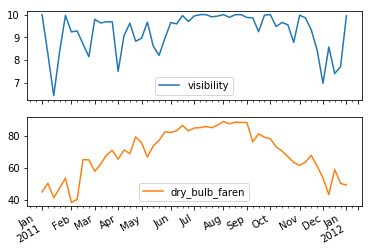

In [23]:

weekly_mean = df_clean[['visibility','dry_bulb_faren']].resample('w').mean()
print (weekly_mean.corr())
weekly_mean.plot(subplots=True)
plt.show()


Daily hours of clear sky : I have used a box plot to visualize the fraction of days that are sunny. ('sky_condition' column is recorded hourly)

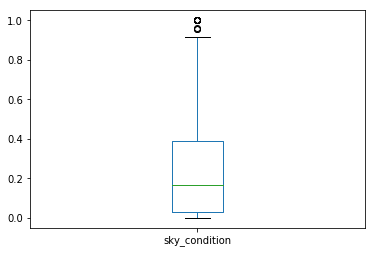

In [32]:

sunny = df_clean['sky_condition'] == 'CLR'


sunny_hours = sunny.resample('D').sum()


total_hours = sunny.resample('D').count()


sunny_fraction = sunny_hours / total_hours


sunny_fraction.plot(kind='box')
plt.show()


Heat or humidity
Dew point is a measure of relative humidity based on pressure and temperature. A dew point above 65 is considered uncomfortable while a temperature above 90 is also considered uncomfortable.

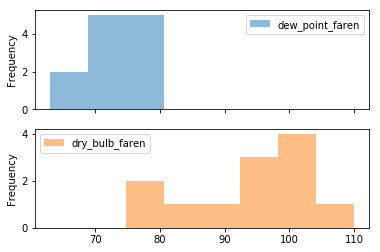

In [15]:
monthly_max =df_clean[['dew_point_faren','dry_bulb_faren']].resample('m').max()
monthly_max.plot(kind='hist', bins = 8, alpha = 0.5, subplots = True)
plt.show()

Probability of high temperatures:
We already know that 2011 was hotter than the climate normals for the previous thirty years. Now I have compared the maximum temperature in August 2011 against that of the August 2010 climate normals. More specifically, I have used a CDF plot to determine the probability of the 2011 daily maximum temperature in August being above the 2010 climate normal value.

95.3


/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


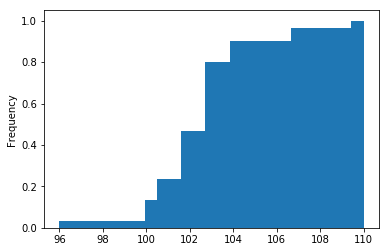

In [16]:
# Extract the maximum temperature in August 2010 from df_climate: august_max
august_max = df_climate.loc['2010-Aug','Temperature'].max()
print(august_max)

# Resample the August 2011 temperatures in df_clean by day and aggregate the maximum value: august_2011
august_2011 = df_clean.loc['2011-Aug','dry_bulb_faren'].resample('D').max()

# Filter for days in august_2011 where the value exceeded august_max: august_2011_high
august_2011_high = august_2011.loc[august_2011 > august_max]

# Construct a CDF of august_2011_high
august_2011_high.plot(kind='hist', normed=True, cumulative=True, bins=25)

# Display the plot
plt.show()


Once you've generated the CDF, notice how it shows that there was a 50% probability of the 2011 daily maximum temperature in August being 5 degrees above the 2010 climate normal value!